# Adversial Attacks
## Tricking Artificial Neural Networks

Rishitosh Kumar Singh

Roll number : 1602710114

# What is Artificial Neural Network?

Artificial Neural Network ANN is an efficient computing system whose central theme is borrowed from the analogy of biological neural networks. ANNs are also named as “artificial neural systems,”

<p align="center">
  <img src="images/biological_artificial.png">
</p>


# How they works?

Network tries to minimize loss by adjusting learnable parameters (eg. Weights and Biases).

![SegmentLocal](images/neural_network.gif "segment")

# Current Scenario

* Since 2013, deep neural networks have matched and in somecase surpassed human performance. 
* Speech Recognition
* Face Recognition
* Autopilots

## Adversial Examples

Adversarial examples are inputs to a neural network that result in an incorrect output from the network.

<img src="images/panda.png" width="1000" height="200" align="center"/>
<img src="images/panda2.png" width="1000" height="200" align="center"/>

Assassination by neural network. Sound crazy? Well, it might happen someday, and not in the way you may think. Of course, neural networks could be trained to pilot drones or operate other weapons of mass destruction, but even an innocuous (and presently available) network trained to drive a car could be turned to act against its owner. This is because neural networks are extremely susceptible to something called adversarial examples.

You can start with an image of a panda on the left which some network thinks with 57.7% confidence is a “panda.” The panda category is also the category with the highest confidence out of all the categories, so the network concludes that the object in the image is a panda. But then by adding a very small amount of carefully constructed noise you can get an image that looks exactly the same to a human, but that the network thinks with 99.3% confidence is a “gibbon.” Pretty crazy stuff!

## Some Adversial Attacks

![Attack 1](images/attack1.png)

![Attack 2](images/sticker.png)

## Attacking Tesla Autopilot

*"Hackers have also demonstrated how they could trick a Tesla Model S to enter into the wrong lane by using a method called "adversarial attack", a way of manipulating a Machine Learning model."*

![tesla lane](images/tesla_lane.png)

# Classification of Adversial Attacks

## Adversary's Goal
*What is the goal or purpose of the attacker? Does he want to misguide the classifier’s decision on one sample, or influence the overall performance of the classifier?*
* Targeted Attack 
* Non-Targeted Attack

## Adversary's Knowledge

*What information is available to the attacker? Does he know the classifier’s structure, its parameters or the training set used for classifier training?*
* White-Box Attack
* Black-Box Attack

## Targated Attack

Consider a L-M-N, a 3 layered network consisting of L's input neurons, M's hidden neurons and N's Output neurons.
<img src="images/adversial_network.jpg" width="500" height="800" align="center"/>

$Loss = \frac{1}{2} \sum \limits_{n=1}^{N} \left({y_{goal}}_n - y_n \right)^2 + \lambda \sum \limits_{l=1}^{L} \left({x_{target}}_l - x_l \right)^2 $

$x_l = x_l - \frac{\partial Loss}{\partial x_l}$

$\frac{\partial Loss}{\partial x_l} = -\sum\limits_{m=1}^{M} \left( \sum\limits_{n=1}^{N} ({y_{goal}}_n - y_n) f'(v_n) w_{mn} \right) f'(V_m) w_{lm} - 2\lambda ({x_{target}}_l - x_l )$

# Let's perform a targeted adversial attack on a trained Network

Importing Libraries

In [8]:
from NeuralNetwork2 import ANN2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import joblib
% matplotlib inline

In [11]:
import warnings
warnings.filterwarnings('ignore')

## MNIST Dataset
The MNIST database of handwritten digits has a training set of $60,000$ examples, and a test set of $10,000$ examples.

Each image is of size $28$ X $28$    

<img src="images/mnist.png" width="800" height="800" align="center"/>

In [38]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [40]:
X_train = train_data.iloc[:,1:].values / 255
y_train = train_data.iloc[:,0].values.reshape(X_train.shape[0],1)
X_test = test_data.iloc[:,1:].values / 255
y_test = test_data.iloc[:,0].values.reshape(X_test.shape[0],1)

In [41]:
lr = np.arange(10)
one_hot = []
for label in y_train.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_train = one_hot
one_hot = []
for label in y_test.ravel():
    one_hot.append((lr==label).astype(np.int).tolist())
y_test = one_hot

## Loading Trained Network

In [22]:
model = joblib.load('Trained1Network.model')

### Network Architecture : 784, [20], 10

### Input Neurons : 784 (28 X 28)

### Hidden Layers : 1 (20 Neurons)

### Output Neurons : 10

## Testing Network

Predicted : 0
Target : 0


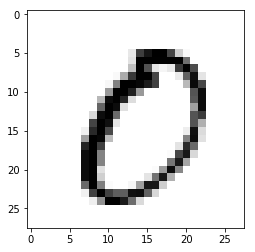

In [37]:
sample = 30
y_pred = model.predict(X_test[sample].reshape(1,784)).ravel()
print("Predicted : {}".format(np.argmax(y_pred)))
print("Target : {}".format(np.argmax(y_test[sample])))
plt.imshow(X_test[sample].reshape(28,28),cmap='gray_r')
plt.show()

## Let's fool our network 

In [9]:
X_target = X_test[sample].ravel()
y_goal = y_test[sample+1]

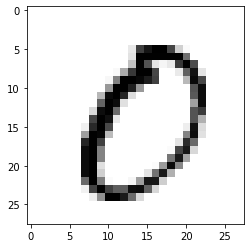

Predicted      : 0
Adversial Goal : 3
Predicted      : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Adversial Goal : [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [10]:
plt.imshow(X_target.reshape(28,28),cmap='gray_r')
plt.show()
print('Predicted      : {}'.format(np.argmax(y_pred)))
print('Adversial Goal : {}'.format(np.argmax(y_goal)))
print('Predicted      : {}'.format(y_test[sample]))
print('Adversial Goal : {}'.format(y_goal))

In [ ]:
adversial_image = model.get_adversial_image(X_target=X_target,
                                            y_goal=y_goal,
                                            seed=2,
                                            learning_rate=0.01,
                                            _lambda=0.4,
                                            epochs=4000,
                                            print_results=False)

In [6]:
adversial_images = joblib.load('adversial_images.ik')

## Generated Adversial Images 

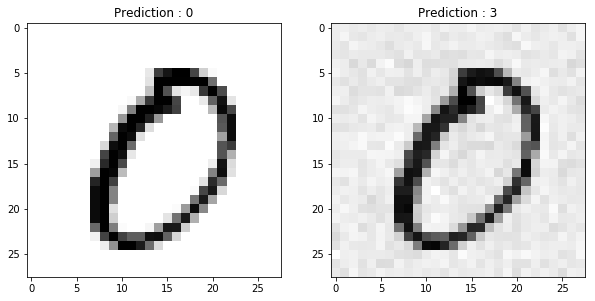

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.imshow(adversial_images[0]['actual_image'].reshape(28,28),cmap='gray_r')
ax1.set_title('Prediction : {}'.format(np.argmax(adversial_images[0]['actual_prediction'])))
ax2.imshow(adversial_images[0]['adversial_image'].reshape(28,28),cmap='gray_r')
ax2.set_title('Prediction : {}'.format(np.argmax(adversial_images[0]['y_pred_adversial'])))
fig.show()

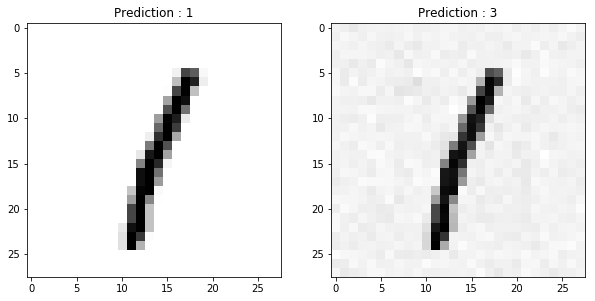

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.imshow(adversial_images[1]['actual_image'].reshape(28,28),cmap='gray_r')
ax1.set_title('Prediction : {}'.format(np.argmax(adversial_images[1]['actual_prediction'])))
ax2.imshow(adversial_images[1]['adversial_image'].reshape(28,28),cmap='gray_r')
ax2.set_title('Prediction : {}'.format(np.argmax(adversial_images[1]['y_pred_adversial'])))
fig.show()

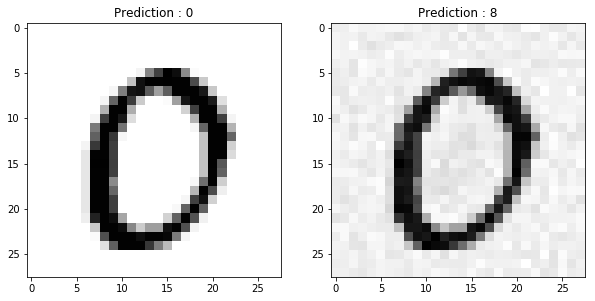

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.imshow(adversial_images[2]['actual_image'].reshape(28,28),cmap='gray_r')
ax1.set_title('Prediction : {}'.format(np.argmax(adversial_images[2]['actual_prediction'])))
ax2.imshow(adversial_images[2]['adversial_image'].reshape(28,28),cmap='gray_r')
ax2.set_title('Prediction : {}'.format(np.argmax(adversial_images[2]['y_pred_adversial'])))
fig.show()

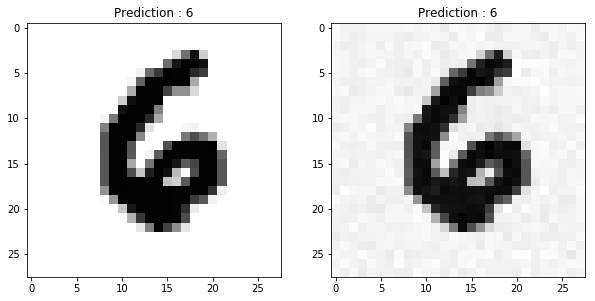

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,10))
ax1.imshow(adversial_images[3]['actual_image'].reshape(28,28),cmap='gray_r')
ax1.set_title('Prediction : {}'.format(np.argmax(adversial_images[3]['actual_prediction'])))
ax2.imshow(adversial_images[3]['adversial_image'].reshape(28,28),cmap='gray_r')
ax2.set_title('Prediction : {}'.format(np.argmax(adversial_images[3]['y_pred_adversial'])))
fig.show()

In [23]:
pred = model.predict(adversial_images[3]['actual_image'].reshape(1,784)).ravel()
print(np.around(pred,decimals=2))
print(np.around(adversial_images[3]['y_pred_adversial'],decimals=2))

[0.   0.   0.   0.   0.04 0.   0.97 0.   0.   0.  ]
[0.   0.   0.   0.   0.1  0.   0.17 0.   0.   0.02]


# Some other methods

## Disturbed panda: Fast gradient sign method

* Goodfellow et. al (2014) proposed the fast gradient sign method for generating adversarial images.
* The original image x is manipulated by adding or subtracting a small error $\epsilon$ to each pixel

![adversial_panda](images\adversial_panda.jpg)

$x' = x + \epsilon \cdot sign \left( \bigtriangledown_x J\right) $

## 1-pixel Attack

* The approach presented by Goodfellow and colleagues (2014) requires many pixels to be changed, if only by a little.
![pixel](images\adversarial-1pixel.jpg)

# Black Box Attacks

* Adversarial examples generated for one neural network architecture will transfer very well to another architecture.

![Black_Box](images/black_box2.jpg)

# Protection Against Adversarial Attacks

### Binary thresholding 
One naive thing we could try is to use binary thresholding to completely white out the background

With binary thresholding: 


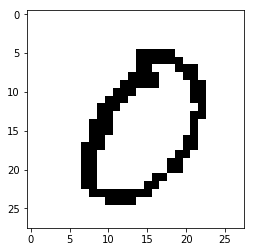

Prediction : 0


In [27]:
new_image = (adversial_images[0]['adversial_image'] > .5).astype(float)
print("With binary thresholding: ")
plt.imshow(new_image.reshape(28,28), cmap="gray_r")
plt.show()
new_pred = model.predict(new_image.reshape(1,784)).ravel()
print('Prediction : {}'.format(np.argmax(new_pred)))